# Iris

## Get started
> **Note:** this notebook uses python 3 as kernel

This notebook assumes the data is already downloaded and stored at ../data/raw

if not, execute the next:

`python ../src/data/get_dataset.py`


## 1. Read data

We can start import the libraries (pandas, numpy, seaborn, matplotlib) and load the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="muted")
dfIris = pd.read_csv('../data/raw/iris.data')
print(dfIris)
dfIris.info()

     5.1  3.5  1.4  0.2     Iris-setosa
0    4.9  3.0  1.4  0.2     Iris-setosa
1    4.7  3.2  1.3  0.2     Iris-setosa
2    4.6  3.1  1.5  0.2     Iris-setosa
3    5.0  3.6  1.4  0.2     Iris-setosa
4    5.4  3.9  1.7  0.4     Iris-setosa
..   ...  ...  ...  ...             ...
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica

[149 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


# 2. Clean Data

## **Profiling Report**

We use the pandas profiling library because It is a quick way to understand the dataset and know a previous analysis related to the data. Such as outliers, redundant and missing data.

In [2]:
from pandas_profiling import ProfileReport
profile = ProfileReport(dfIris, title="Pandas Profiling Report")
profile.to_widgets()

### Naming columns

First of all, we check the information of data.
We need to name the colums since there's no column names.
It is noticable that 'class label' is the only object type.

In [3]:
#column naming & check info
dfIris.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class label']
dfIris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  149 non-null    float64
 1   sepal width   149 non-null    float64
 2   petal length  149 non-null    float64
 3   petal width   149 non-null    float64
 4   class label   149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### Reshaping data

We want to see the data by class label.
The data can be reshaped by melt method.

In [4]:
dfIris = pd.melt(dfIris,"class label", var_name ="measurement")
print(dfIris)

        class label   measurement  value
0       Iris-setosa  sepal length    4.9
1       Iris-setosa  sepal length    4.7
2       Iris-setosa  sepal length    4.6
3       Iris-setosa  sepal length    5.0
4       Iris-setosa  sepal length    5.4
..              ...           ...    ...
591  Iris-virginica   petal width    2.3
592  Iris-virginica   petal width    1.9
593  Iris-virginica   petal width    2.0
594  Iris-virginica   petal width    2.3
595  Iris-virginica   petal width    1.8

[596 rows x 3 columns]


## 3.Data Exploration

<AxesSubplot:xlabel='measurement', ylabel='value'>

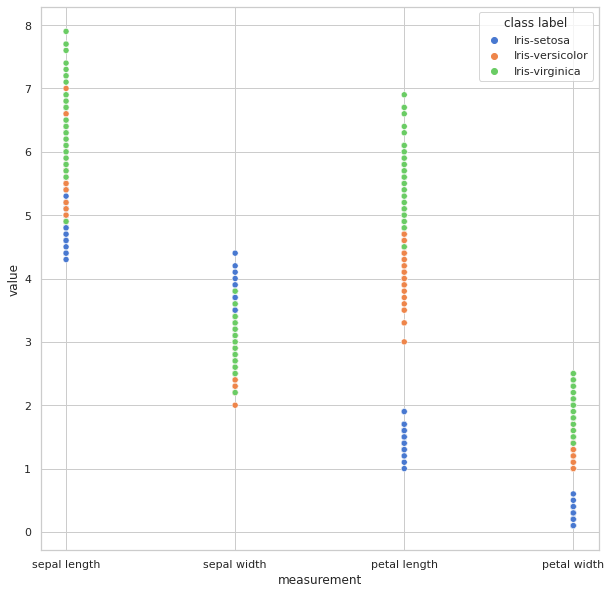

In [5]:
%matplotlib inline
plt.figure(figsize=(10, 10))
sns.scatterplot(x="measurement", y="value", hue="class label", data=dfIris)

<AxesSubplot:xlabel='measurement', ylabel='value'>

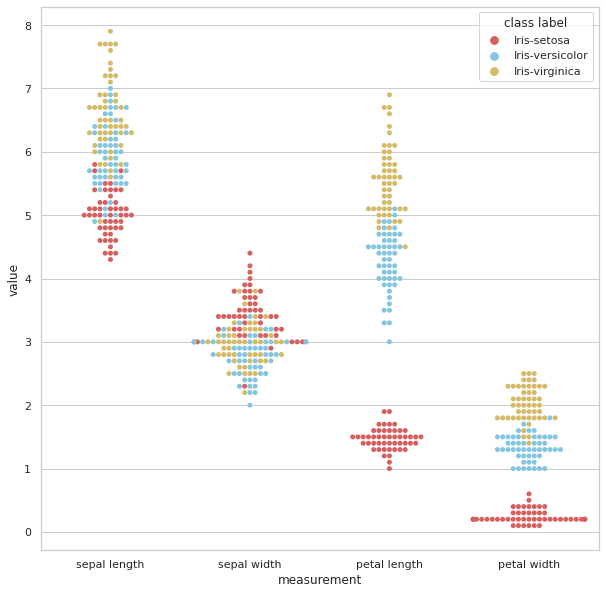

In [6]:
%matplotlib inline
plt.figure(figsize=(10, 10))
sns.swarmplot(x="measurement", y="value", hue="class label", palette=["r","c","y"],data=dfIris,s=5)